# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as **métricas de performance**. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.




<br><br>

### Considere o dataset abaixo:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pickle as pck

In [2]:
df = pd.read_csv("dataframe_exercicio_modulo_8.csv")
print(df.shape)
df[:10]

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47
5,3.0,16.986504,37.977078,4.0,34
6,5.0,6.940413,32.146399,2.0,188
7,4.0,34.361866,66.974023,7.0,35
8,4.0,9.558897,57.056682,1.0,309
9,5.0,2.799313,69.527911,7.0,327


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br><br>
### Veficando Dados Faltantes

In [3]:
df.isnull().values.any()

False

In [4]:
df.isnull().sum().sum()

0

In [5]:
print('Valores 0 em Indice Tamanho Populacao : {0}'.format(len(df.loc[df['ind_pop_cid'] == 0])))
print('Valores 0 em Percentual de Policiais: {0}'.format(len(df.loc[df['perc_pol'] == 0])))
print('Valores 0 em Taxa de Crimes: {0}'.format(len(df.loc[df['taxa_crim'] == 0])))
print('Valores 0 em Nivel de Educação: {0}'.format(len(df.loc[df['nivel_ed'] == 0])))
print('Valores 0 em Qtde de Crimes: {0}'.format(len(df.loc[df['crimes'] == 0])))

Valores 0 em Indice Tamanho Populacao : 0
Valores 0 em Percentual de Policiais: 0
Valores 0 em Taxa de Crimes: 0
Valores 0 em Nivel de Educação: 0
Valores 0 em Qtde de Crimes: 3


In [6]:
df.loc[df.crimes == 0]

,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
409,1.0,30.568984,72.518590,8.0,0
1225,2.0,11.976767,27.618345,6.0,0
1503,5.0,10.305849,16.205368,4.0,0


### 409 possui um valor incomum, onde a taxa de criminalidade é de 72,5% e no mês não houve nenhum crime
<br>
Para a realização do exercicio foi considerado: <br>

**SUPONDO** *O Aumento de policiais nas ruas do mês passado, a carretou na mudança da segurança da cidade*

<br><br>
### Correlação das variaveis

<AxesSubplot:>

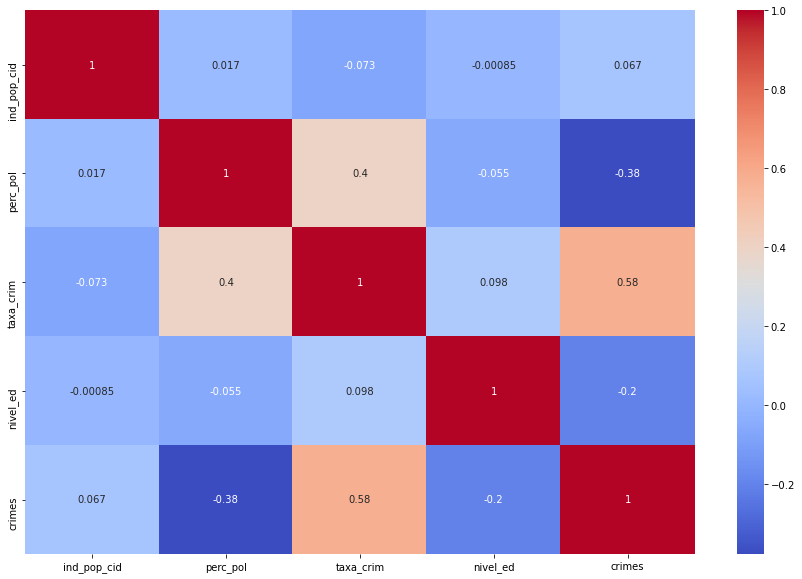

In [7]:
plt.figure(figsize=[15,10])
sns.heatmap(df.corr(), annot = True, cmap='coolwarm')

<br><br>
*Foi escolhida a Variavel **Porcentagem de Policiais (polc_pol)** para realizar a analise*

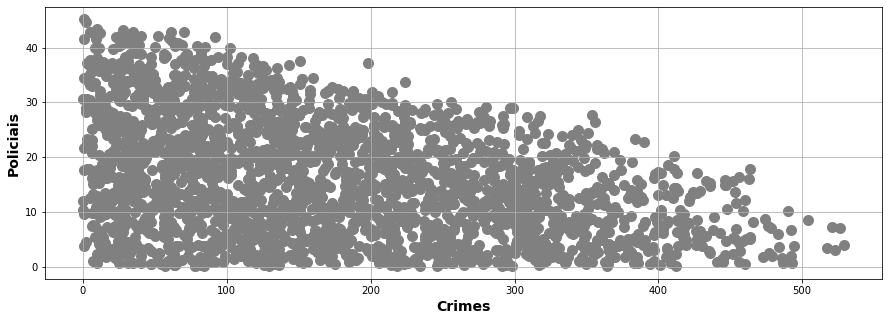

In [8]:
plt.figure(figsize=[15,5])
plt.scatter(df['crimes'], df['perc_pol'], s = 100, c = 'gray')
plt.xlabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel('Policiais', fontweight = 'bold', fontsize = 14)
plt.grid()
plt.show()

*A Variavel polc_pol possui uma correlação forte negativa, podendo verificar que o numero de policiais nas ruas afeta diretamente no numeros de crimes.*
<br><br>

### Modelo de Regresão Linear

In [9]:
import sklearn as sk

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
def MSE(y, y_pred):
    return np.mean((y - y_pred)**2)

def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [12]:
def div_dataframe00(df,valor):
    X = df['perc_pol'].values.reshape(-1,1)
    y = df['crimes'].values.reshape(-1,1)
    x_treino, x_teste, y_treino, y_teste = train_test_split(X,y,test_size=valor,random_state = 0)
    
    return x_treino, x_teste, y_treino, y_teste

def div_dataframe01(df,valor):
    lista = list(['ind_pop_cid','perc_pol','taxa_crim','nivel_ed'])
    X = df[lista].values.reshape(-1,4)
    y = df['crimes'].values.reshape(-1,1)
    x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size=valor, random_state = 0)
    
    return x_treino, x_teste, y_treino, y_teste

def div_dataframe02(df,valor):
    x = int(round((df.shape[0]*valor)/100))
    df_treino = df[:x]
    df_teste = df[x:]
    
    return df_treino,df_teste


#def div_dataframe_type02(df,valor,atributos,target):
    #X = df[atributos].values.reshape(-1,1)
    #y = df[target].values.reshape(-1,1)
    #x_treino,x_teste,y_treino,y_teste = train_test_split(X,y,test_size=valor,random_state = 0)
    #
    #return  x_treino, x_teste, y_treino, y_teste
    #
#def div_dataframe_type03(df,valor,atributos,target):
    #X = df[atributos].values.reshape(-1,4)
    #y = df[target].values.reshape(-1,1)
    #x_treino,x_teste,y_treino,y_teste = train_test_split(X,y,test_size=valor,random_state = 0)
    #
    #return  x_treino, x_teste, y_treino, y_teste


In [13]:
df_train, df_teste = div_dataframe02(df,30)

In [14]:
df_train, df_teste

(     ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
 0            1.0   7.185471  62.082693      10.0      77
 1            1.0  24.456750  88.244380       6.0     202
 2            1.0  19.791772  94.930257       1.0     348
 3            4.0  10.089496  41.791507       6.0     114
 4            3.0  34.697495  67.615795       1.0      47
 ..           ...        ...        ...       ...     ...
 733          2.0  34.435603  71.312823       2.0      89
 734          3.0  28.540587  96.145296       6.0     229
 735          5.0  29.784757  91.958276       9.0     135
 736          5.0  23.266921  56.553075       3.0     158
 737          5.0  10.208191  69.127132       9.0     193
 
 [738 rows x 5 columns],
       ind_pop_cid   perc_pol  taxa_crim  nivel_ed  crimes
 738           2.0  13.122765  47.557927       2.0     157
 739           4.0  16.001866  42.225315       7.0      43
 740           1.0  19.669987  79.002191       8.0     206
 741           2.0   7.593896  75.488700 

In [15]:
x_treino, x_teste, y_treino, y_teste = div_dataframe00(df,0.30)

In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
modelo_lm01 = LinearRegression()

In [18]:
type(x_treino), type(y_treino)

(numpy.ndarray, numpy.ndarray)

In [19]:
modelo_lm01.fit(x_treino, y_treino)

LinearRegression()

In [20]:
ypred = modelo_lm01.predict(x_treino)
ypred

array([[ 55.03077221],
       [148.5026624 ],
       [114.18796168],
       ...,
       [242.82516686],
       [129.85385455],
       [250.33572464]])

## Métrica de performance

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
r2_score(y_true= y_treino, y_pred = ypred)

0.1591766742882028

In [23]:
RMSE(y = y_treino, y_pred = ypred)

111.01346382085983

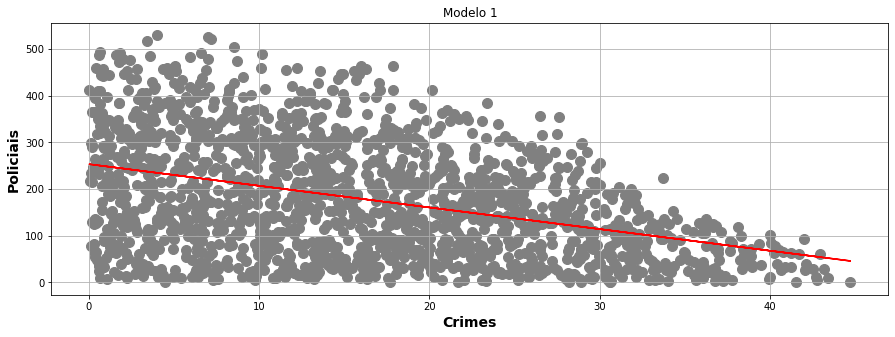

In [24]:
plt.figure(figsize=[15,5])
plt.title("Modelo 1")
plt.scatter(x_treino, y_treino, s = 100, c = 'gray')
plt.xlabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel('Policiais', fontweight = 'bold', fontsize = 14)

plt.plot(x_treino, ypred, c="red")
plt.grid()

<br><br>

### Utilizando Modelo KNN

In [25]:
from sklearn.neighbors import KNeighborsRegressor

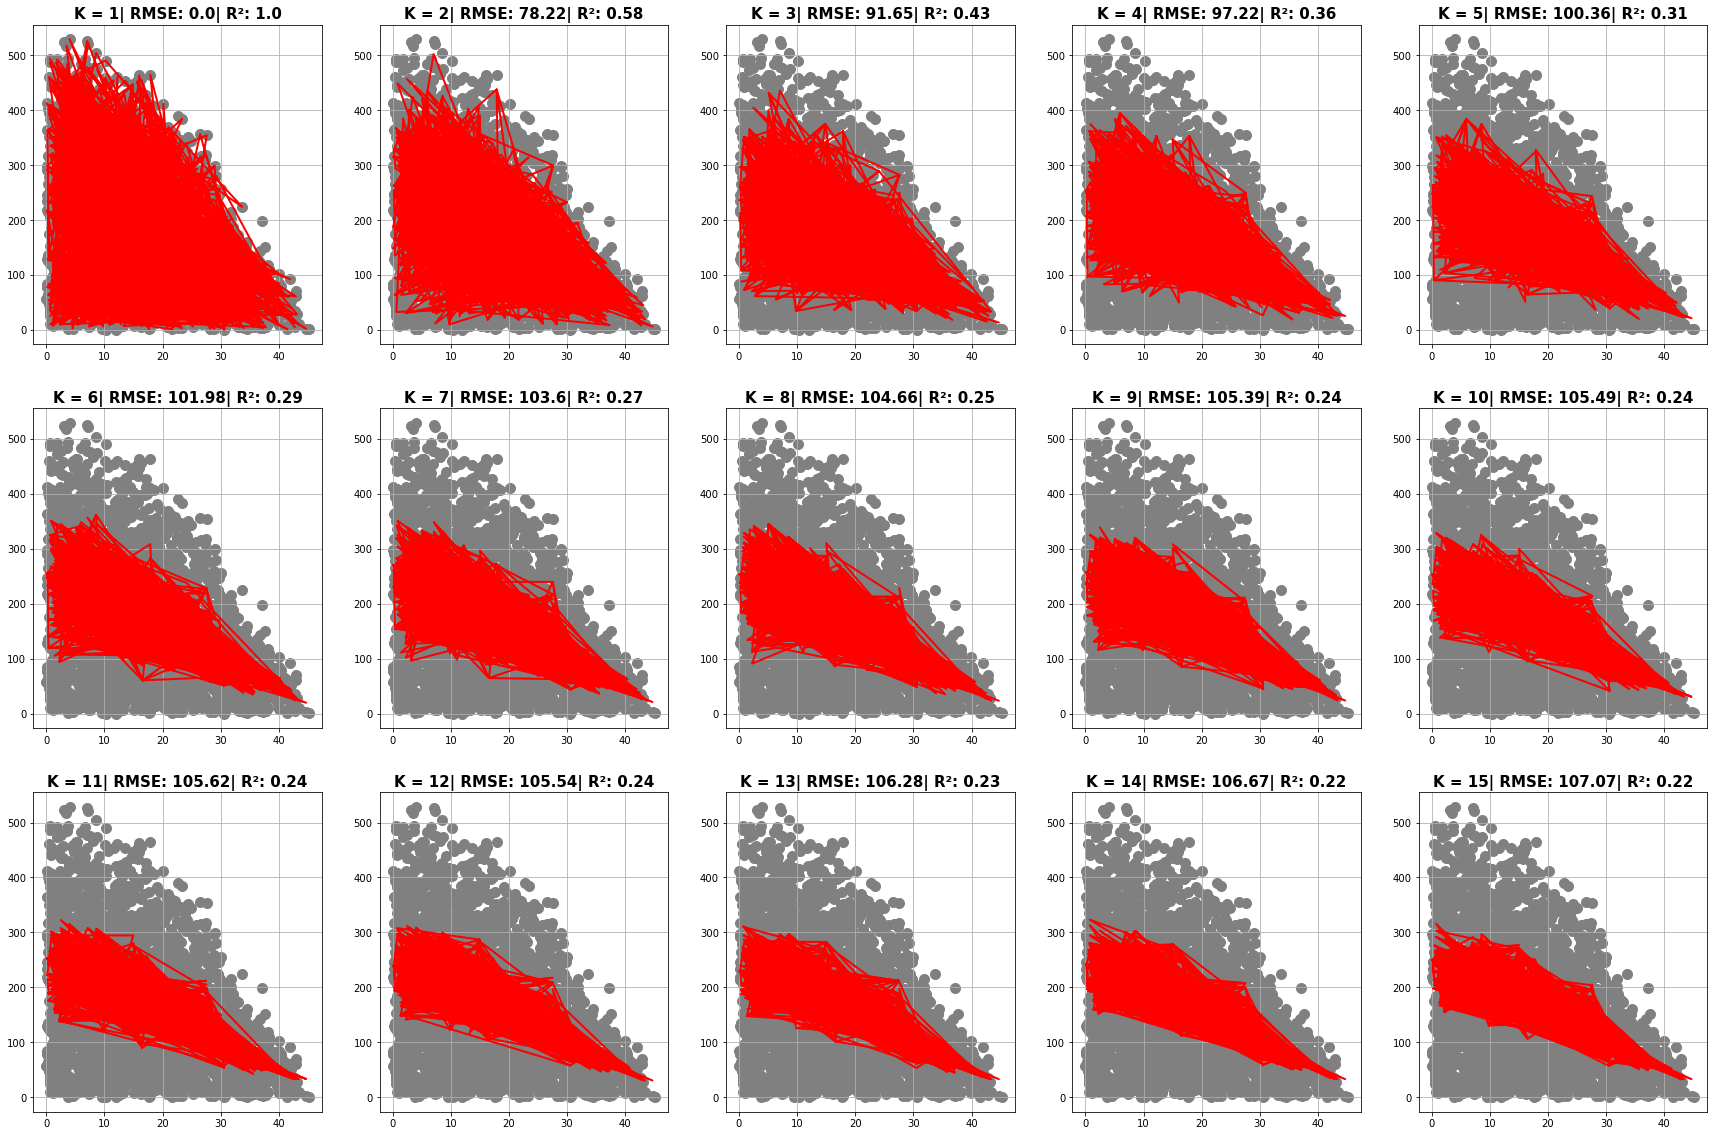

In [26]:
plt.figure(figsize=[30,20])

for i in range(1, 16):
    knn = KNeighborsRegressor(n_neighbors = i).fit(x_treino, y_treino)
    rmse_knn = np.round(RMSE(y = y_treino, y_pred = knn.predict(x_treino)), 2)
    r2 = round(r2_score(y_true=y_treino,y_pred= knn.predict(x_treino)),2)
    
    plt.subplot(3,5,i)
    plt.title("K = "+str(i)+"| RMSE: " + str(rmse_knn)+ "| R²: "+str(r2), fontsize = 15, fontweight = 'bold')
    plt.plot(x_treino, knn.predict(x_treino), c = 'red', lw = 2)
    plt.scatter(df['perc_pol'], df['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

## Observação: O metodo de ML KNN está 'Overfitando' os Dados, o melhor metodo que representa bem os dados é o metodo de regressão linear
<br><br>

### Utilizando todas as variaveis disponiveis
### Regresão Linear

In [27]:
xx_treino, xx_teste, yy_treino, yy_teste = div_dataframe01(df,0.30)

In [28]:
modelo_lm02 = LinearRegression()

In [29]:
modelo_lm02.fit(xx_treino,yy_treino)

LinearRegression()

In [30]:
ypred02 = modelo_lm02.predict(xx_treino)

In [31]:
r2_score(y_true = yy_treino, y_pred = ypred02)

0.9094895069057114

*Acuracia de 90% , indicios de overfitting*

In [32]:
RMSE(xx_treino,ypred02)

194.9128990002459

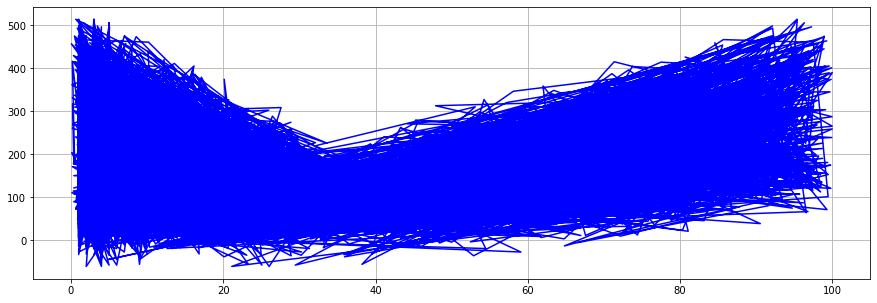

In [33]:
plt.figure(figsize=[15,5])
plt.plot(xx_treino, ypred02, c="blue")
plt.grid()

<br><br>

### Utilizando Modelo KNN

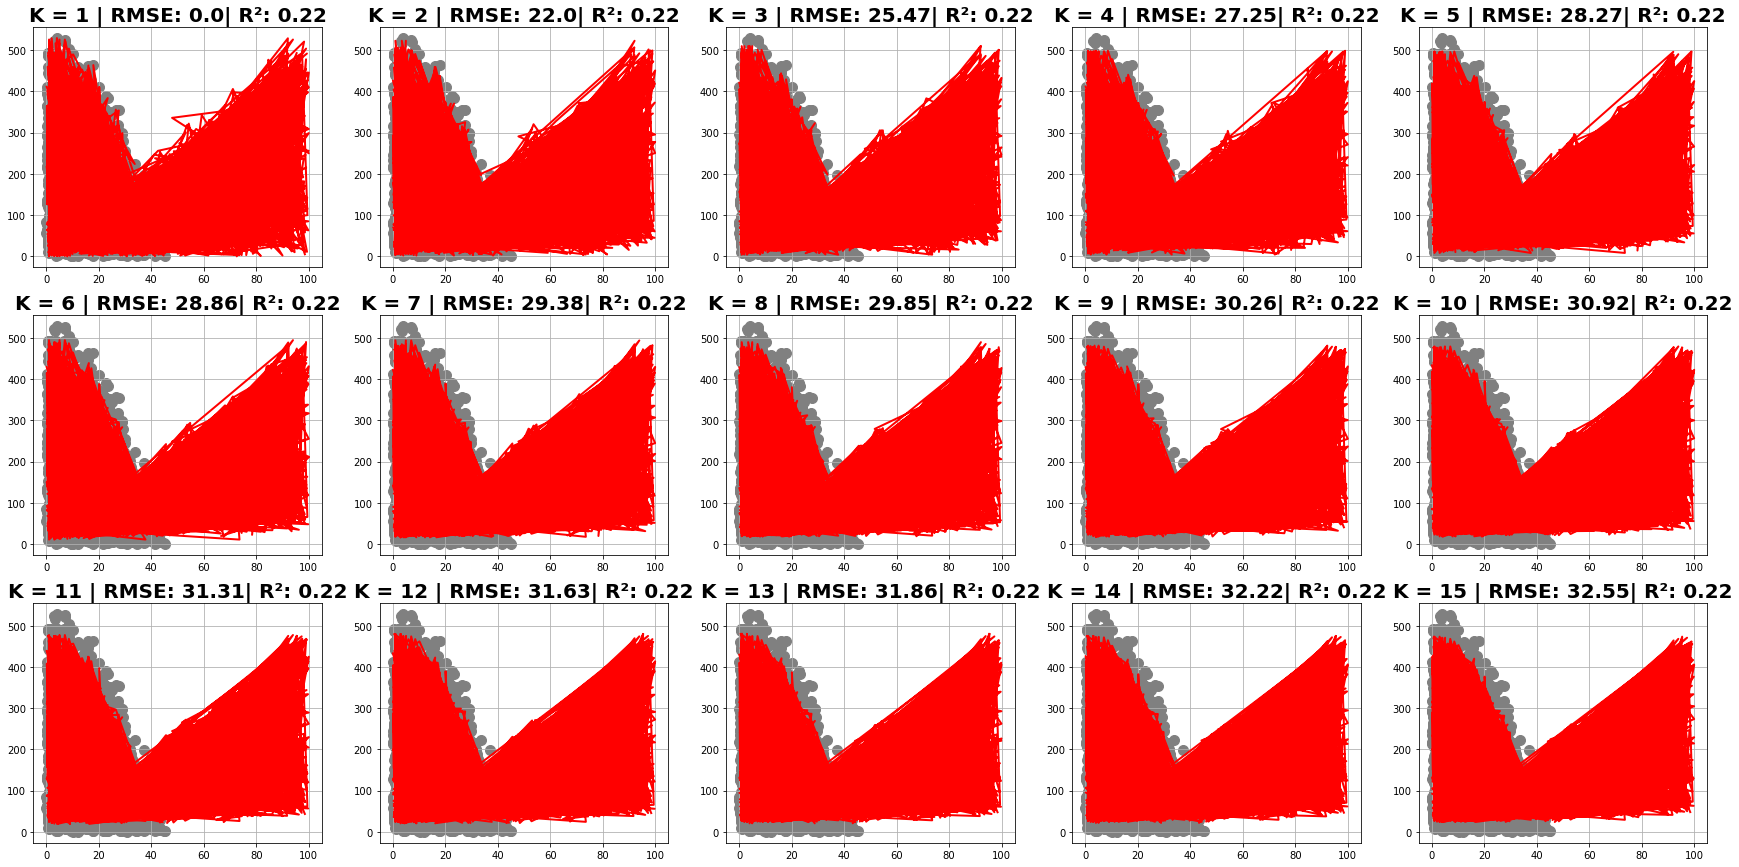

In [34]:
plt.figure(figsize=[30,15])

for i in range(1, 16):
    knn01 = KNeighborsRegressor(n_neighbors = i).fit(xx_treino, yy_treino)
    rmse_knn01 = np.round(RMSE(y = yy_treino, y_pred = knn01.predict(xx_treino)), 2)
    r2 = round(r2_score(y_true=y_treino,y_pred= knn.predict(x_treino)),2)
    
    plt.subplot(3,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn01)+ "| R²: "+str(r2), fontsize = 20, fontweight = 'bold')
    plt.plot(xx_treino, knn01.predict(xx_treino), c = 'red', lw = 2)
    plt.scatter(df['perc_pol'], df['crimes'], s = 100, c = 'gray')
    plt.grid()

plt.show()

## Observação: Utilizando todas as variaveis, os metodos de regressão linear e KNN tiveram Overfitting.
## Observação: Utilizando mais variaveis no treinamento aumenta a acuracia, assim tambem o overfitting
<br> <br>

### *Utilizando o Melhor modelo treinado*

In [35]:
filename = 'modelo_treinado.sav'
pck.dump(modelo_lm01, open(filename, 'wb'))

In [36]:
load_model = pck.load(open(filename,'rb'))

In [37]:
y_pred_teste = load_model.predict(x_teste)

In [38]:
RMSE(y = y_teste, y_pred = y_pred_teste)

110.95360350093584

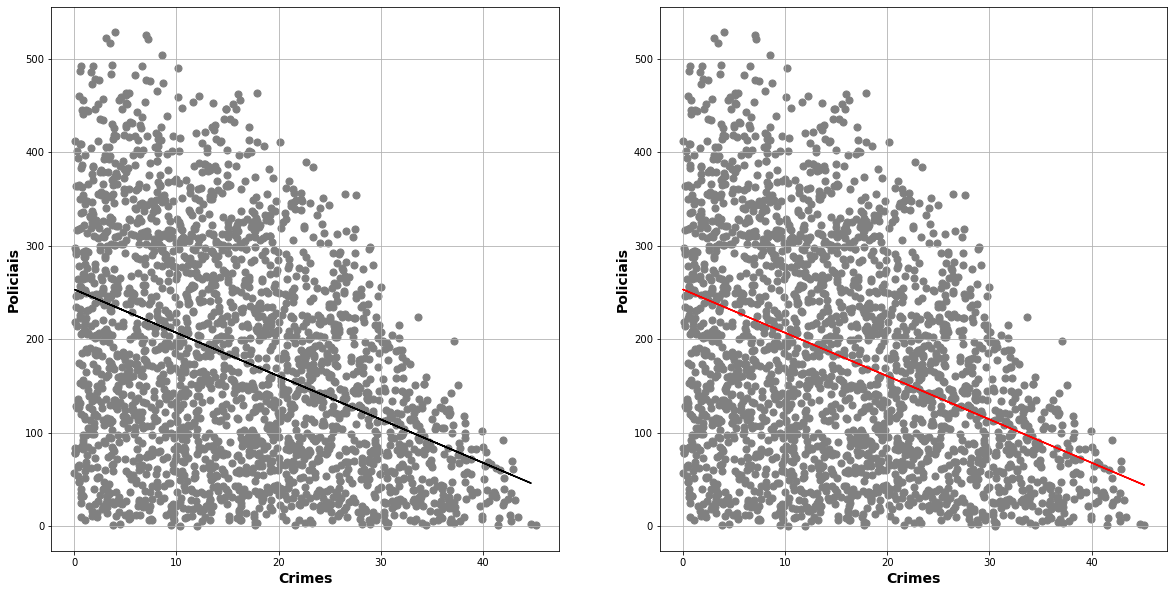

In [39]:
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.scatter(df['perc_pol'], df['crimes'],s=50, c = 'gray')
plt.xlabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel('Policiais', fontweight = 'bold', fontsize = 14)
plt.plot(x_treino, ypred, c="black")
plt.grid()

plt.subplot(1,2,2)
plt.scatter(df['perc_pol'], df['crimes'], s = 50, c = 'gray')
plt.xlabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel('Policiais', fontweight = 'bold', fontsize = 14)
plt.plot(x_teste, y_pred_teste, c="red")
plt.grid()

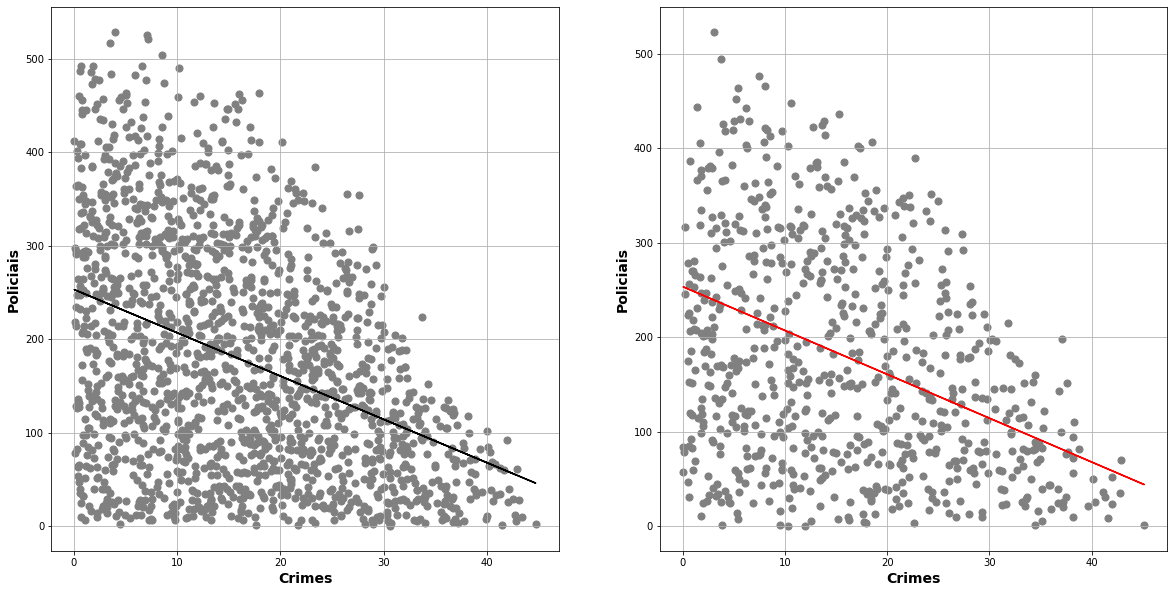

In [40]:
#DADOS DE TREINO
plt.figure(figsize=[20,10])
plt.subplot(1,2,1)
plt.scatter(x_treino, y_treino,s=50, c = 'gray')
plt.xlabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel('Policiais', fontweight = 'bold', fontsize = 14)
plt.plot(x_treino, ypred, c="black")
plt.grid()

#DADOS DE TESTE
plt.subplot(1,2,2)
plt.scatter(x_teste, y_teste ,s=50, c = 'gray')
plt.xlabel("Crimes", fontweight = 'bold', fontsize = 14)
plt.ylabel('Policiais', fontweight = 'bold', fontsize = 14)
plt.plot(x_teste, y_pred_teste, c="red")
plt.grid()

*Pode-se observar que o modelo treinado teve o resultado esperando com os valores de teste.*